In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

选取数据

In [2]:
target = 3
data_name = ['0618', '0854', '1066'][target - 1]

采用Elbow方法选取最优C值

In [3]:
def optimal_c_value(features, max_c=15):
    # max_c=10-15基本可以满足大部分特征这也是Elbow的上限
    
    sse = []  # 存储SSE（聚类内误差平方和）
    silhouette_scores = []  # 存储轮廓系数，用于聚类效果评估越大效果越好

    # 计算不同C值下的SSE和轮廓系数
    for c in range(2, max_c + 1): # C从2取到max_c
        kmeans = KMeans(n_clusters=c, random_state=42)
        kmeans.fit(features)
        sse.append(kmeans.inertia_) #读取当前聚类的SSE存入列表
        silhouette_scores.append(silhouette_score(features, kmeans.labels_))

    # 绘制Elbow图和轮廓系数图
    plt.figure(figsize=(14, 6))
    
    # Elbow图
    plt.subplot(1, 2, 1)
    plt.plot(range(2, max_c + 1), sse, marker='o')
    plt.xlabel("C-value")
    plt.ylabel("SSE")
    plt.title("Elbow search optimal C-value")
    
    # 轮廓系数图
    plt.subplot(1, 2, 2)
    plt.plot(range(2, max_c + 1), silhouette_scores, marker='o')
    plt.xlabel("C-value")
    plt.ylabel("silhouette scores")
    plt.title("silhouette scores search optimal C-value")

    plt.show()

    # 选取拐点（Elbow法）或轮廓系数最大的C值
    optimal_c = 2 + np.argmax(silhouette_scores)  # 最佳C值
    return optimal_c

Kmeans实现

In [4]:
def Kmeans(features, optimal_c):

    kmeans = KMeans(n_clusters=optimal_c, random_state=0)
    labels = kmeans.fit_predict(features)
    return kmeans, labels



# 可以根据需求进一步分析聚类结果，例如绘制聚类分布图等

寻求最优C值并进行聚类分析

In [5]:
# 假设 'features_hsv' 和 'features_resnet' 是已经提取的不同特征集
features_bgr3x3 = np.load(f'./Features/{data_name}_BGR3x3_featuers.npy')  
features_hsv3x3 = np.load(f'./Features/{data_name}_HSV3x3_features.npy')  
features_resnet = np.load(f'./Features/{data_name}_NN_features.npy').squeeze().reshape(512).reshape(-1, 1)
print(features_bgr3x3.shape)
print(features_hsv3x3.shape)
print(features_resnet.shape)

(1250, 27)
(1250, 27)
(512, 1)


BGR3x3特征聚类分析:


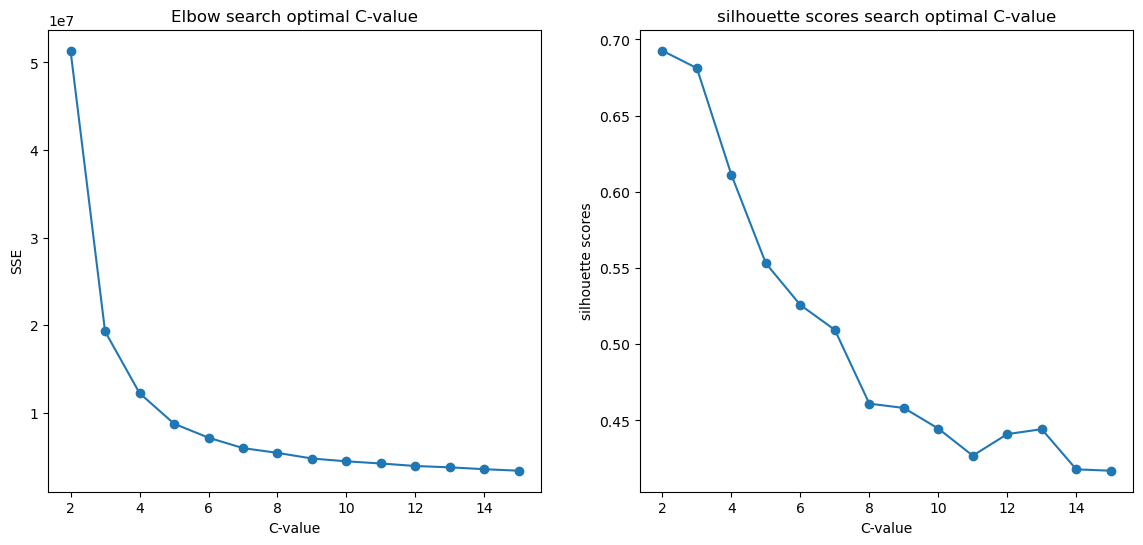

最优C值（ResNet特征）：2


In [6]:
# 分别计算不同特征的最优C值并进行聚类
print("BGR3x3特征聚类分析:")
optimal_c_bgr3x3 = optimal_c_value(features_bgr3x3)
kmeans_bgr3x3, labels_bgr3x3 = Kmeans(features_bgr3x3, optimal_c_bgr3x3)
print(f"最优C值（ResNet特征）：{optimal_c_bgr3x3}")

HSV3x3特征聚类分析:


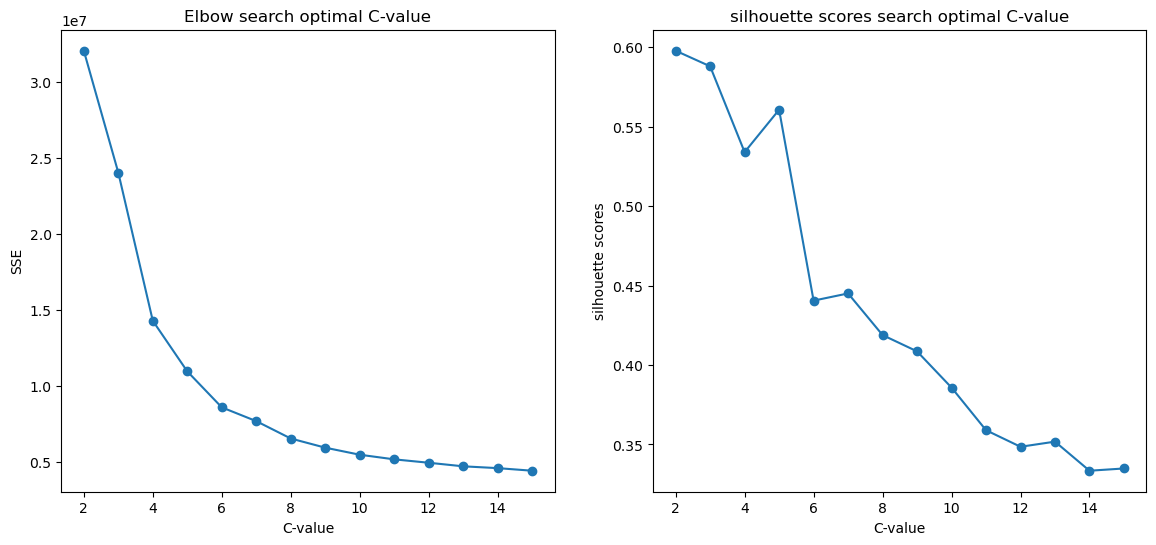

最优C值（HSV特征）：2


In [7]:
print("HSV3x3特征聚类分析:")
optimal_c_hsv3x3 = optimal_c_value(features_hsv3x3)
kmeans_hsv3x3, labels_hsv3x3 = Kmeans(features_hsv3x3, optimal_c_hsv3x3)
print(f"最优C值（HSV特征）：{optimal_c_hsv3x3}")

ResNet特征聚类分析:


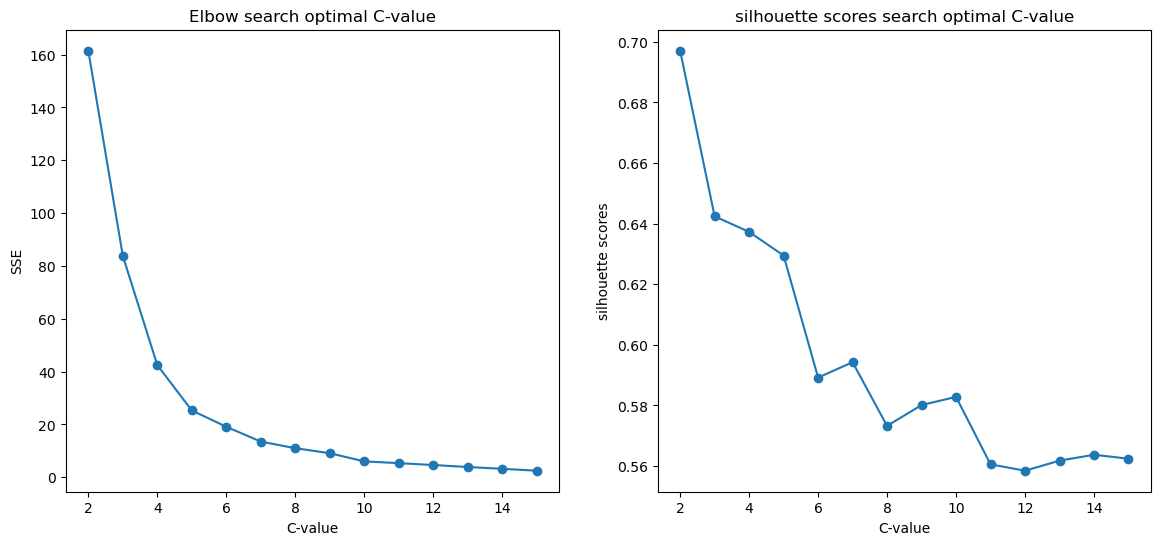

最优C值（ResNet特征）：2


In [8]:
print("ResNet特征聚类分析:")
optimal_c_resnet = optimal_c_value(features_resnet)
kmeans_resnet, labels_resnet = Kmeans(features_resnet, optimal_c_resnet)
print(f"最优C值（ResNet特征）：{optimal_c_resnet}")